In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import scipy.stats as sts
%matplotlib inline

In [33]:
data_auto=pd.read_csv('auto.csv')
data_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [34]:
print(data_auto.describe())

        symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         126.365854   98.756585  174.049268   65.907805   
std      1.245307          35.438400    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.300000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  205.000000  205.000000   
mean    53.724878  2555.565854   126.907317    3.324878    3.253366   
std      2.443522   520.680204    41.642693    0.273049    0.313937   
min     47.800000  1488.000000 

In [5]:
data_auto.isnull().sum().sort_values(ascending = False)

price                0
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
symboling            0
dtype: int64

In [6]:
correlation_matrix = data_auto.corr(method ='pearson').round(2)
correlation_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.50,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.50,1.00,-0.03,0.05,0.12,-0.33,0.15,0.17,0.01,0.04,-0.15,0.27,0.23,-0.29,-0.26,0.20
wheel-base,-0.53,-0.03,1.00,0.87,0.80,0.59,0.78,0.57,0.50,0.16,0.25,0.30,-0.36,-0.47,-0.54,0.57
length,-0.36,0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.70,0.68
width,-0.23,0.12,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.60,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1.00,0.30,0.07,0.20,-0.04,0.26,-0.11,-0.32,-0.05,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.80,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.60,0.21,0.03,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.01,0.50,0.61,0.56,0.20,0.65,0.60,1.00,-0.05,0.01,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.04,0.16,0.13,0.18,-0.04,0.17,0.21,-0.05,1.00,0.19,0.16,-0.05,-0.03,-0.04,0.08


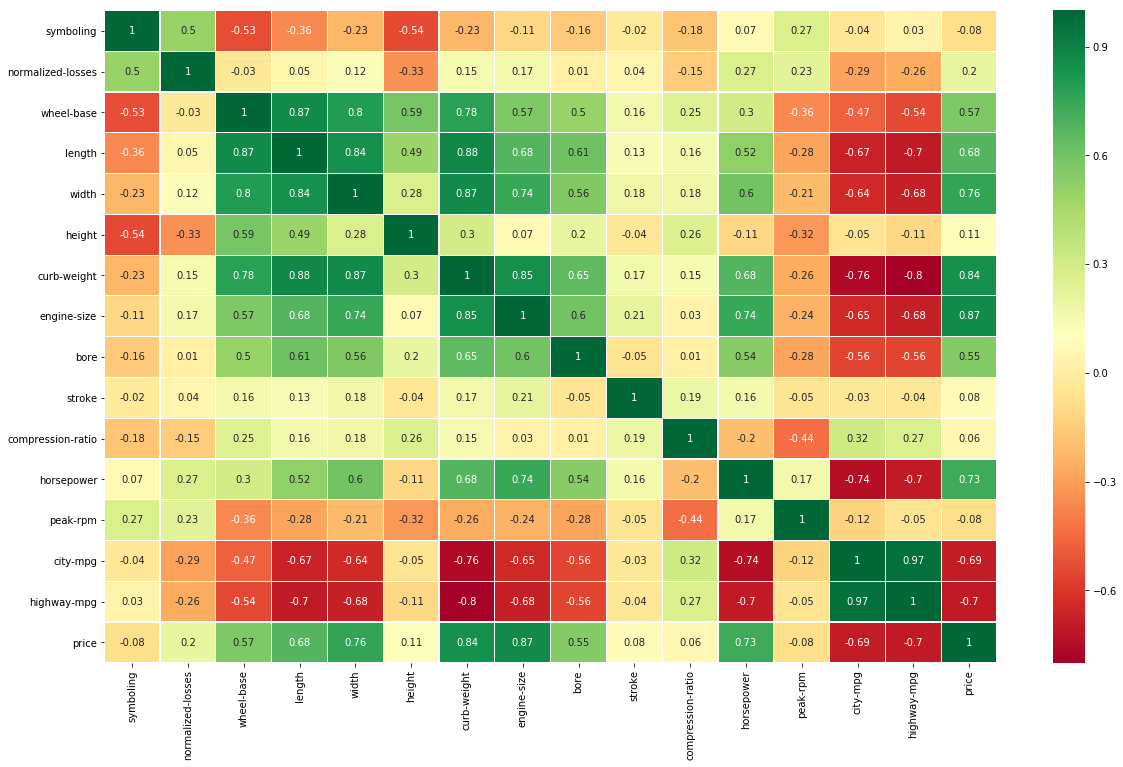

In [7]:
sns.heatmap(correlation_matrix,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

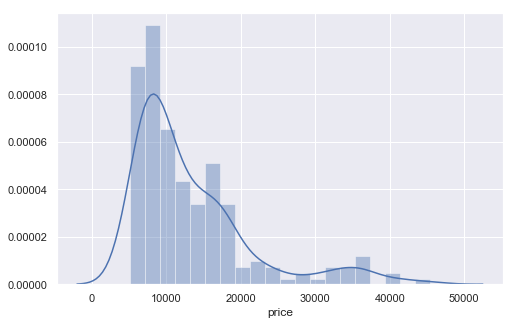

In [14]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(data_auto['price'], bins=20)
plt.show()

In [23]:
data_auto['price'].kurtosis()

2.948637293212561

In [24]:
data_auto['price'].skew()

1.7663998888191028

In [ ]:
#На визуализации выше довольно много коррелируемых между собой занчений. Я взяла несколько 
#'wheel-base',  'engine-size', 'wheel-base', 'price', 'length', 'height'  с разбивкой по категории 'body-style'

d:\miniconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


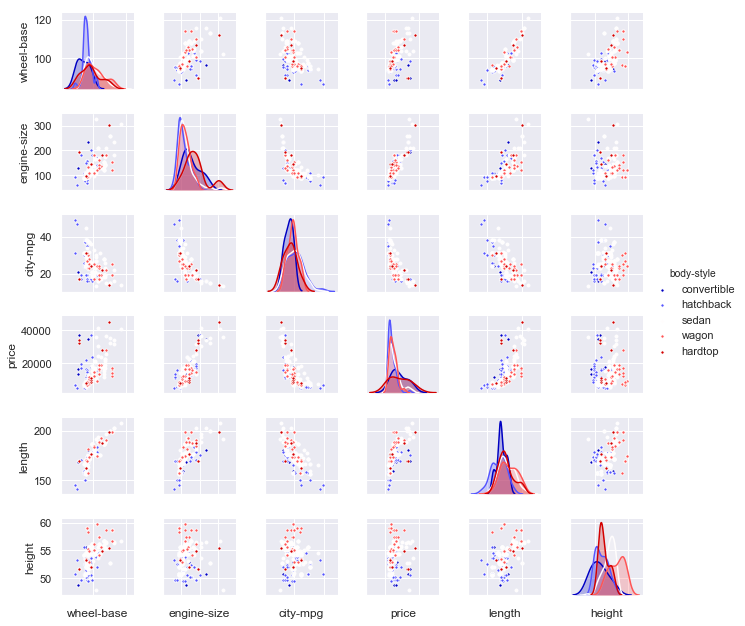

In [32]:
auto_g = sns.pairplot(data=data_auto[['wheel-base',  'engine-size', 'city-mpg', 'price', 'length', 'height', 'body-style']], hue='body-style', palette = 'seismic',
                 size=1.,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
auto_g.set(xticklabels=[])

In [36]:
#В самом наборе данных много коррелируемых значений. 
#Рассмотрим зависимость engine-size (видимо это размер двигателя) от city-mpg (мили на галлон топлива в городе)
#Визуально, корреляция отрицательная. Видимо, чем больше размер двигателя, тем меньше показатель мили на галлон топлива.
#то есть авто с большим двигателем расходует больше топлива и проедет меньше миль на один галлон.
#Так как показатели сильно коррелюруют между собой, проверим, что эти показатели имеют разные средние значения

In [35]:
stats.ttest_ind(data_auto['engine-size'], data_auto['city-mpg'])

Ttest_indResult(statistic=34.53923030809512, pvalue=3.475375128940203e-123)

In [37]:
#p-value меньше уровня значимости, а это значит, что можно отвергнуть нулевую гипотезу, и показатели имеют разные средние

In [42]:
#Проверим взаимосвязь между wheel-base (я не знаю, что это) и length (может быть это длина авто).
#Кореляция положительная, то есть чем больше wheel-base, тем больше length

In [38]:
stats.ttest_ind(data_auto['wheel-base'], data_auto['length'])

Ttest_indResult(statistic=-78.52501821672536, pvalue=2.214091958718416e-248)

In [43]:
#p-value меньше уровня значимости, а это значит, что можно отвергнуть нулевую гипотезу, и показатели имеют разные средние

In [44]:
#И проверим взаимосвязь между price (цена) и height (может быть это вес авто).
#Визуально, корреляции нет

In [41]:
stats.ttest_ind(data_auto['price'], data_auto['height'])

Ttest_indResult(statistic=23.42986047384074, pvalue=1.5442930521875772e-77)

In [45]:
#и опять p-value меньше уровня значимости, можно отвергнуть нулевую гипотезу, и показатели имеют разные средние